In [1]:
def heavyside(x: float) -> float:
    return 0 if x < 0 else 1

def q0Func(x: float) -> float:
    return heavyside(20-x)

In [2]:
import math
hx = 1 # Шаг по пространству
ht = 0.1 # Шаг по времени
N = 100 # Количество шагов сетки
T = 100 # Конечная точка по времени
u = 0.5 # Скорость

layersCount = math.ceil(T / ht)

precise = [q0Func(i*hx) for i in range(N)]
leftDif = [[0.0 for x in range(N+1)] for l in range(layersCount)] # 2 layers
centerDif = [[0.0 for x in range(N+1)] for l in range(layersCount)] # 2 layers
cabaret = [[0.0 for x in range(N+1)] for l in range(layersCount)] # 3 layers
weightedDif = [[0.0 for x in range(N+1)] for l in range(layersCount)] # 3 layers

times = [layer*ht for layer in range(layersCount)]


leftDif[0] = centerDif[0] = cabaret[0] = weightedDif[0] = [q0Func(i*hx) for i in range(N+1)]

In [3]:
# 2-layered
for layer in range (1, layersCount):
    for i in range (1, N):
        leftDif[layer][i] = leftDif[layer-1][i] - (u * ht)* (leftDif[layer-1][i]-leftDif[layer-1][i-1])/hx
        centerDif[layer][i] = centerDif[layer-1][i] - 0.5*(u * ht)* (centerDif[layer-1][i+1]-centerDif[layer-1][i-1])/hx


# For 3 layered shemes calc 1st layer
for i in range(N):
    cabaret[1][i] = u*ht*(cabaret[0][i]-cabaret[0][i-1])/hx
    weightedDif[1][i] = u*ht*(weightedDif[0][i]-weightedDif[0][i-1])/hx

for layer in range(2, layersCount):
    for i in range (1, N):
        cabaret[layer][i] = cabaret[layer-1][i]- (cabaret[layer-1][i-1]-cabaret[layer-2][i-1])-2*(u*ht)* (cabaret[layer-1][i]-cabaret[layer-1][i-1])/hx
        weightedDif[layer][i] = weightedDif[layer-1][i]- 0.5*(weightedDif[layer-1][i-1]-weightedDif[layer-2][i-1])-0.25*(u*ht)* (weightedDif[layer-1][i+1]+4*weightedDif[layer-1][i]-5*weightedDif[layer-1][i-1])/hx

In [4]:
def err(an: list, calc: list) -> float:
    err= 0.0
    for i in range(len(an)):
        err += abs(an[i]-calc[i])
    return err / len(an)

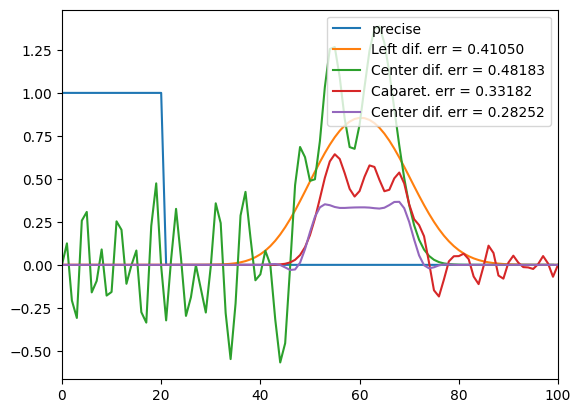

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(precise, label="precise")
ax.plot(leftDif[layersCount-1], label=f"Left dif. err = {format(err(precise, leftDif[layersCount-1]), '.5f')}")
ax.plot(centerDif[layersCount-1], label=f"Center dif. err = {format(err(precise, centerDif[layersCount-1]), '.5f')}")
ax.plot(cabaret[layersCount-1], label=f"Cabaret. err = {format(err(precise, cabaret[layersCount-1]), '.5f')}")
ax.plot(weightedDif[layersCount-1], label=f"Weighted dif. err = {format(err(precise, weightedDif[layersCount-1]), '.5f')}")
ax.set_xbound(0, hx*N)

plt.legend()
plt.show()